![](img/banner.png)
%%HTML
<script src="require.js"></script>

# Image segmentation by hierarchical clustering

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [ ]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/mfds'):
    !git clone https://github.com/fum-cs/mfds.git
    %cd mfds/notebooks

In [2]:
# وارد کردن کتابخانه های مورد نیاز
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# تعریف پوشه ای که تصاویر jpg در آن قرار دارند
folder = "images"

# خواندن تصاویر و تبدیل آنها به آرایه های NumPy
images = []
for filename in os.listdir(folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(folder, filename))
        img = np.array(img)
        images.append(img)

# تعداد تصاویر
n = len(images)

# محاسبه میانگین شدت رنگ پیکسلهای هر تصویر
means = []
for img in images:
    # img = rgb2hsv(img)
    img = rgb2lab(img)
    mean = np.mean(img, axis=(0, 1)) # میانگین بر اساس محورهای ارتفاع و عرض
    means.append(mean)

# تبدیل لیست میانگینها به آرایه NumPy
means = np.array(means)

# خوشهبندی بردارهای میانگین با الگوریتم k-means
k = 3 # تعداد خوشه ها - شما میتوانید این را تغییر دهید
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(means)
# labels = kmeans.labels_ # برچسب خوشه ها
clustering = AgglomerativeClustering(linkage='ward', n_clusters=k)  
labels = clustering.fit_predict(means)
labels

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64)

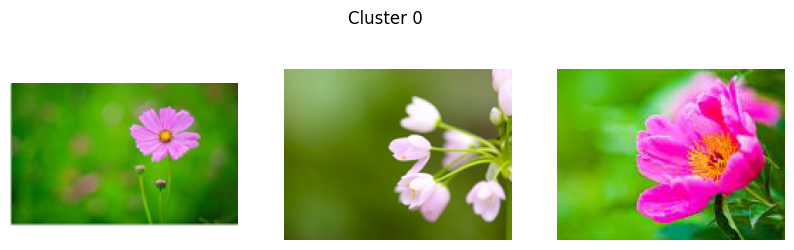

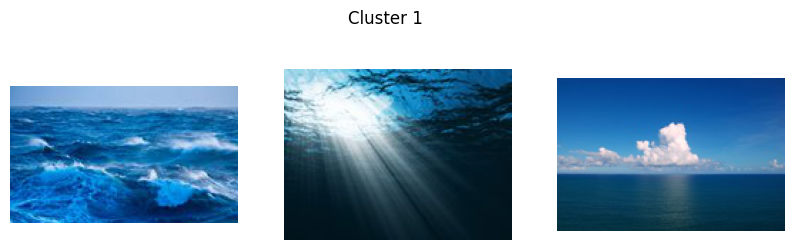

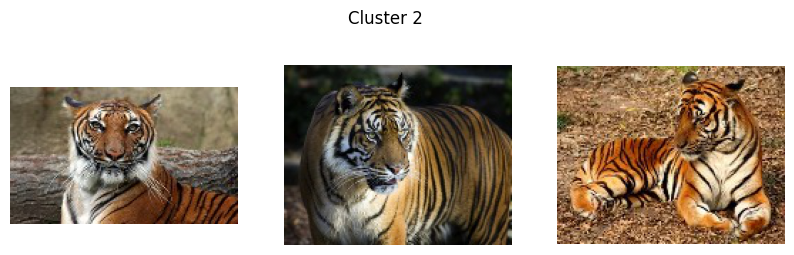

In [3]:
# نمایش تصاویر هر خوشه
for i in range(k):
    # انتخاب تصاویری که به خوشه i تعلق دارند
    cluster = [images[j] for j in range(n) if labels[j] == i]
    # تعداد تصاویر در خوشه i
    m = len(cluster)
    # تعیین اندازه شکل برای نمایش تصاویر
    plt.figure(figsize=(10, 3))
    # حلقه برای نمایش تصاویر
    for j in range(m):
        # ایجاد یک زیر شکل برای هر تصویر
        plt.subplot(1, m, j + 1)
        # حذف محورها
        plt.axis("off")
        # نمایش تصویر
        plt.imshow(cluster[j])
    # نمایش عنوان شکل
    plt.suptitle(f"Cluster {i}")
    # نمایش شکل
    plt.show()

In [4]:
linkage_matrix = linkage(means, method='ward')  # Create linkage matrix
linkage_matrix

array([[  3.        ,   5.        ,  11.38215326,   2.        ],
       [  6.        ,   7.        ,  14.68492426,   2.        ],
       [  1.        ,   2.        ,  15.82979712,   2.        ],
       [  8.        ,  10.        ,  24.22373583,   3.        ],
       [  4.        ,   9.        ,  27.95633024,   3.        ],
       [  0.        ,  11.        ,  30.62255948,   3.        ],
       [ 12.        ,  14.        ,  57.55943682,   6.        ],
       [ 13.        ,  15.        , 107.55176707,   9.        ]])

In [5]:
from scipy.cluster.hierarchy import leaves_list

linkage_matrix = linkage(means, method='ward')  # Create linkage matrix
leaf_order = leaves_list(linkage_matrix)
leaf_order

array([4, 3, 5, 8, 6, 7, 0, 1, 2], dtype=int32)

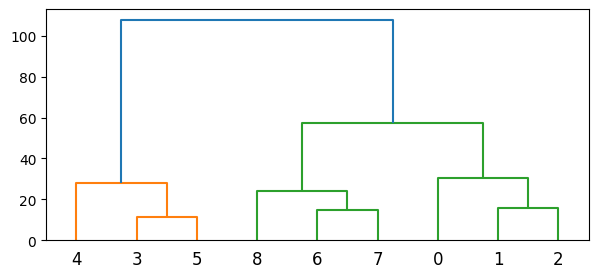

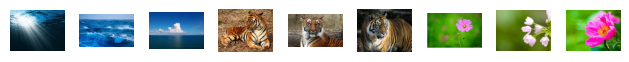

In [6]:
plt.figure(figsize=(7, 3))
dendrogram(linkage_matrix, labels=range(len(means))) 
plt.show()
for j in range(n):
    # ایجاد یک زیر شکل برای هر تصویر
    plt.subplot(1, n, j + 1)
    # حذف محورها
    plt.axis("off")
    # نمایش تصویر
    plt.imshow(images[leaf_order[j]])

plt.tight_layout()
plt.show()